In [1]:
pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.4/819.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2

In [2]:
import numpy as np
import pandas as pd
from darts import TimeSeries

In [6]:
df = pd.read_csv('AirPassengers.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [9]:
series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')

In [11]:
train, val = series[:-36], series[-36:]

In [14]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

In [17]:
prediction

<TimeSeries (DataArray) (Month: 36, component: 1, sample: 1000)>
array([[[377.55991095, 361.92076704, 368.5550806 , ..., 358.41241137,
         344.17323775, 353.22602694]],

       [[357.26471154, 357.20372924, 343.79040639, ..., 347.90754735,
         329.42848749, 329.7587304 ]],

       [[387.72459113, 382.71899559, 400.7626274 , ..., 397.15434965,
         378.1515451 , 392.91370992]],

       ...,

       [[440.19776438, 421.43552657, 434.15100355, ..., 438.81088906,
         430.15140209, 411.3172967 ]],

       [[388.17374652, 358.22128285, 394.8366057 , ..., 387.6524671 ,
         402.02459451, 400.56730285]],

       [[447.09195375, 410.87186063, 400.00607393, ..., 413.03568153,
         444.74965309, 422.4323968 ]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1958-01-01 1958-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

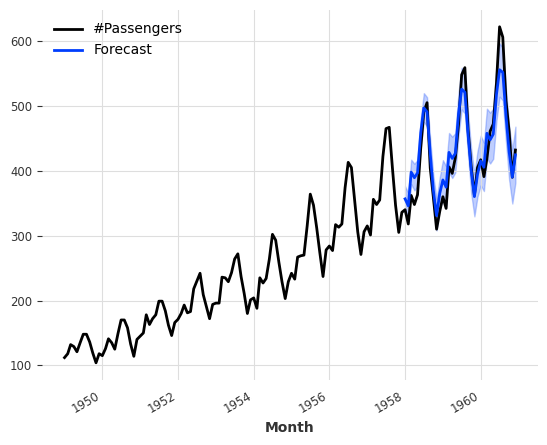

In [16]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label='Forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend();

**Multivariate series**

In [18]:
from darts.datasets import ETTh2Dataset

series = ETTh2Dataset().load()[:10000][["MUFL", "LULL"]]
train, val = series.split_before(0.6)

In [19]:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [20]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

<Axes: xlabel='date'>

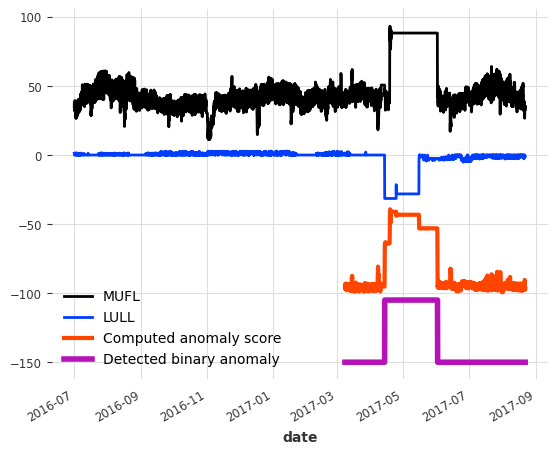

In [21]:
import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label='Computed anomaly score', c='orangered', lw=3)
(binary_anom * 45 - 150).plot(label='Detected binary anomaly', lw=4)